# D600 Task 1

Research question:

How do characteristics such as square footage, number of bedrooms, and number of bathrooms, influence house sale prices?

Goal:

Our goal is to develop a model that will predict house sale prices based on property characteristics, and determine which factors influence this pricing the most. This model will aid real estate companies in every aspect of their work, such as pricing strategies, property values, etc. 

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

def human_format(x, pos):
    #Formats numbers as K, M, B depending on size.
    if abs(x) >= 1e9:
        return f"{x*1e-9:.1f}B"
    elif abs(x) >= 1e6:
        return f"{x*1e-6:.1f}M"
    elif abs(x) >= 1e3:
        return f"{x*1e-3:.1f}K"
    else:
        return f"{x:.0f}"

df = pd.read_csv("../D600 Task 1 Dataset 1 Housing Information.csv")
df.head()

,ID,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,...,RenovationQuality,LocalAmenities,TransportAccess,Fireplace,HouseColor,Garage,Floors,Windows,PreviousSalePrice,IsLuxury
0,4922,255614.8992,566.62,1.000000,4,779.42,20.56,5.62,39.46,10.08,...,4.93,4.44,4.55,Yes,Blue,No,1,13,181861.54230,0
1,5009,155586.0947,1472.34,1.000000,2,656.13,15.62,5.63,40.51,7.89,...,4.08,5.56,6.83,No,Green,No,1,17,50042.59757,0
2,4450,131050.8324,550.00,1.779354,3,754.57,12.47,9.20,48.38,23.74,...,4.26,8.07,8.48,Yes,Green,Yes,2,34,48400.34440,0
3,1070,151361.7125,941.81,2.035254,2,439.59,22.22,7.08,94.67,5.22,...,4.45,5.00,6.27,Yes,Red,No,1,14,84594.12145,0
4,400,113167.6128,550.00,1.064644,3,353.03,8.28,5.93,16.80,43.13,...,3.36,5.46,6.99,No,White,Yes,1,21,22934.59654,0


In [218]:
df.shape

(7000, 22)

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    7000 non-null   int64  
 1   Price                 7000 non-null   float64
 2   SquareFootage         7000 non-null   float64
 3   NumBathrooms          7000 non-null   float64
 4   NumBedrooms           7000 non-null   int64  
 5   BackyardSpace         7000 non-null   float64
 6   CrimeRate             7000 non-null   float64
 7   SchoolRating          7000 non-null   float64
 8   AgeOfHome             7000 non-null   float64
 9   DistanceToCityCenter  7000 non-null   float64
 10  EmploymentRate        7000 non-null   float64
 11  PropertyTaxRate       7000 non-null   float64
 12  RenovationQuality     7000 non-null   float64
 13  LocalAmenities        7000 non-null   float64
 14  TransportAccess       7000 non-null   float64
 15  Fireplace            

In [220]:
df.describe(include="all")

,ID,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,...,RenovationQuality,LocalAmenities,TransportAccess,Fireplace,HouseColor,Garage,Floors,Windows,PreviousSalePrice,IsLuxury
count,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,...,7000.000000,7000.000000,7000.000000,7000,7000,7000,7000.00000,7000.000000,7.000000e+03,7000.00000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,5,2,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,No,White,No,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5172,1446,4488,NaN,NaN,NaN,NaN
mean,3500.500000,3.072820e+05,1048.947459,2.131397,3.008571,511.507029,31.226194,6.942923,46.797046,17.475337,...,5.003357,5.934579,5.983860,NaN,NaN,NaN,1.16300,16.248857,2.845094e+05,0.50400
std,2020.870275,1.501734e+05,426.010482,0.952561,1.021940,279.926549,18.025327,1.888148,31.779701,12.024985,...,1.970428,2.657930,1.953974,NaN,NaN,NaN,0.37209,8.926479,1.857340e+05,0.50002
min,1.000000,8.500000e+04,550.000000,1.000000,1.000000,0.390000,0.030000,0.220000,0.010000,0.000000,...,0.010000,0.000000,0.010000,NaN,NaN,NaN,1.00000,-6.000000,-8.356902e+03,0.00000
25%,1750.750000,1.921075e+05,660.815000,1.290539,2.000000,300.995000,17.390000,5.650000,20.755000,7.827500,...,3.660000,4.000000,4.680000,NaN,NaN,NaN,1.00000,11.000000,1.420140e+05,0.00000
50%,3500.500000,2.793230e+05,996.320000,1.997774,3.000000,495.965000,30.385000,7.010000,42.620000,15.625000,...,5.020000,6.040000,6.000000,NaN,NaN,NaN,1.00000,15.000000,2.621831e+05,1.00000
75%,5250.250000,3.918781e+05,1342.292500,2.763997,4.000000,704.012500,43.670000,8.360000,67.232500,25.222500,...,6.350000,8.050000,7.350000,NaN,NaN,NaN,1.00000,20.000000,3.961212e+05,1.00000


### C1, C2:

From evaluating our dataset, the dependent variable we need is "Price" and the independent variables will be "SquareFootage", "NumBathrooms", and "NumBedrooms". Below I will go through the descriptive stats for each variable.

In [221]:
df["Price"].describe()

count    7.000000e+03
mean     3.072820e+05
std      1.501734e+05
min      8.500000e+04
25%      1.921075e+05
50%      2.793230e+05
75%      3.918781e+05
max      1.046676e+06
Name: Price, dtype: float64

In [222]:
df["SquareFootage"].describe()

count    7000.000000
mean     1048.947459
std       426.010482
min       550.000000
25%       660.815000
50%       996.320000
75%      1342.292500
max      2874.700000
Name: SquareFootage, dtype: float64

In [223]:
df["NumBathrooms"].describe()

count    7000.000000
mean        2.131397
std         0.952561
min         1.000000
25%         1.290539
50%         1.997774
75%         2.763997
max         5.807239
Name: NumBathrooms, dtype: float64

In [224]:
df["NumBedrooms"].describe()

count    7000.000000
mean        3.008571
std         1.021940
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         7.000000
Name: NumBedrooms, dtype: float64

### C3:

Below I generate the univariate and bivariate visualizations for our variables above.

#### Univariate Visualizations for Price, Square Footage, Number of Bedrooms, and Number of Bathrooms:

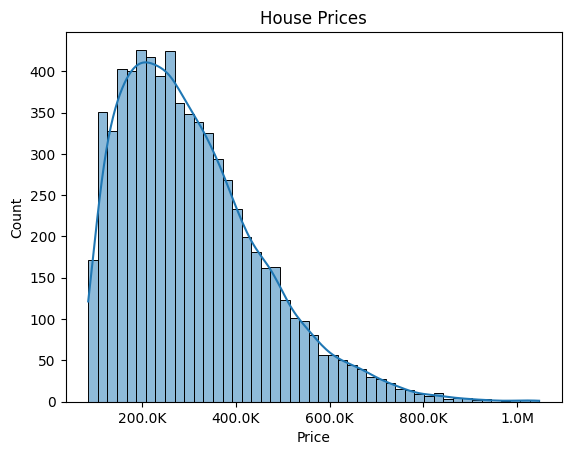

In [225]:
sns.histplot(data=df["Price"], kde=True)
plt.title("House Prices")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(human_format))

Text(0.5, 1.0, 'Square Footage per House')

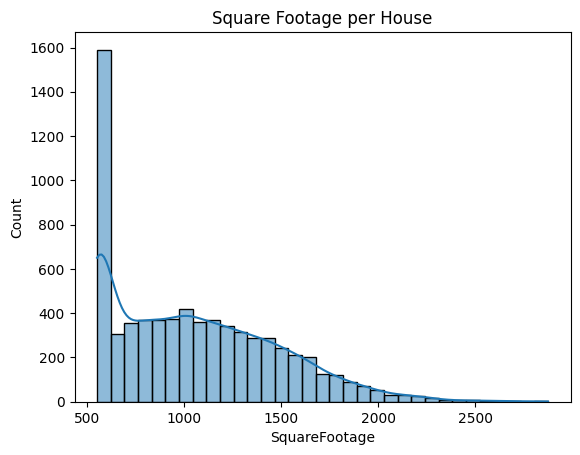

In [226]:
sns.histplot(data=df["SquareFootage"], kde=True)
plt.title("Square Footage per House")

Text(0.5, 1.0, 'Number of Bathrooms per House')

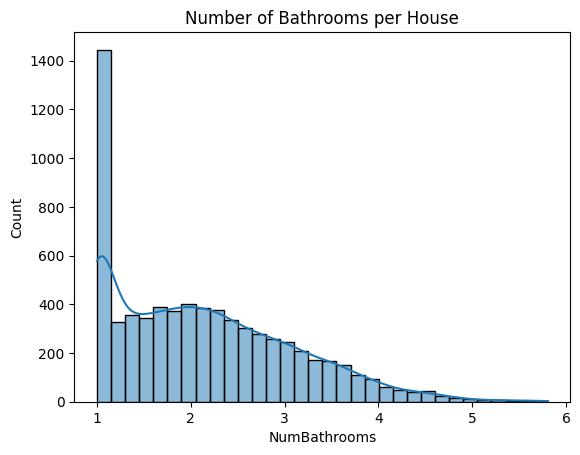

In [227]:
sns.histplot(data=df["NumBathrooms"], kde=True)
plt.title("Number of Bathrooms per House")

Text(0.5, 1.0, 'Number of Bedrooms per House')

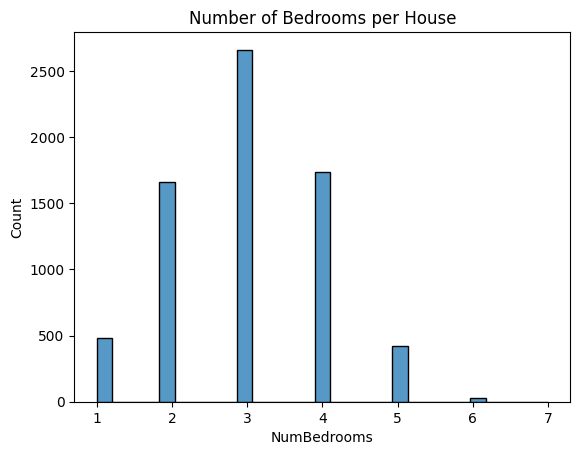

In [228]:
sns.histplot(data=df["NumBedrooms"])
plt.title("Number of Bedrooms per House")

#### Bivariate Visualizations for Price, Square Footage, Number of Bedrooms, and Number of Bathrooms:

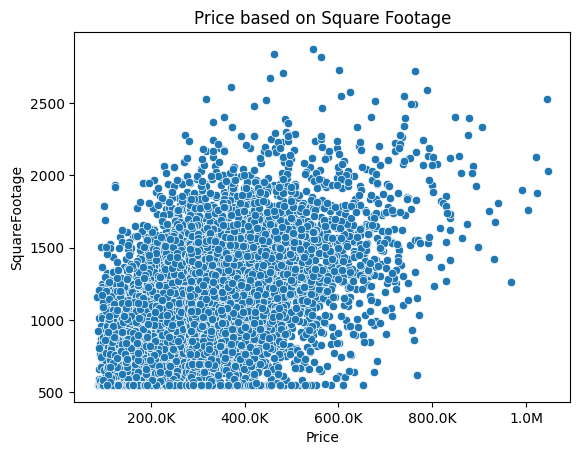

In [229]:
sns.scatterplot(data=df, x="Price", y="SquareFootage")
plt.title("Price based on Square Footage")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(human_format))

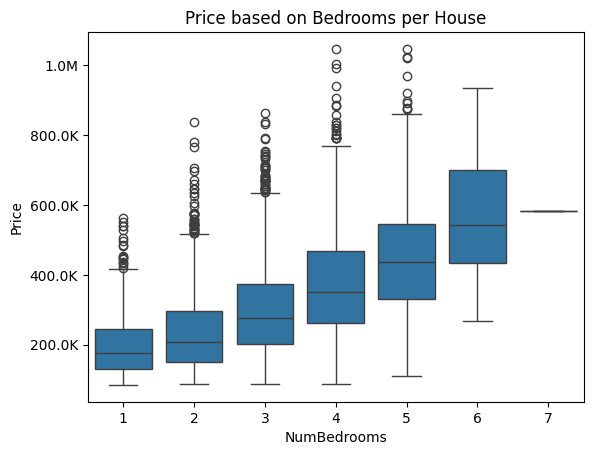

In [230]:
sns.boxplot(data=df, y="Price", x="NumBedrooms")
plt.title("Price based on Bedrooms per House")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(human_format))

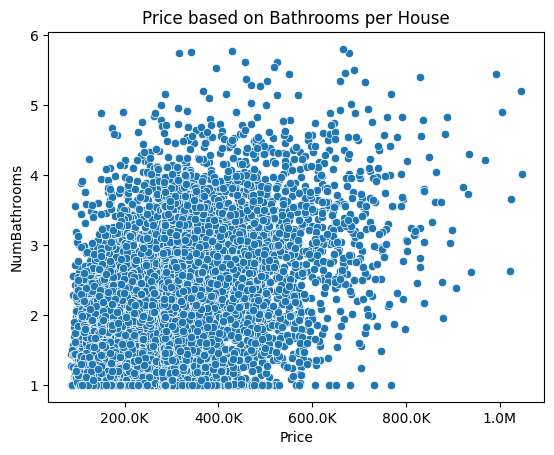

In [231]:
sns.scatterplot(data=df, x="Price", y="NumBathrooms")
plt.title("Price based on Bathrooms per House")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(human_format))

#### D1:
Below I split the data set into a training and test set to be used by our Multiple Linear Regression model. 

In [232]:
x = df[["SquareFootage", "NumBedrooms", "NumBathrooms"]]
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)

#Save our test/train datasets to csv
X_train.assign(Price=y_train).to_csv("train_data.csv", index=False)
X_test.assign(Price=y_test).to_csv("test_data.csv", index=False)

#### D2:

Below I initialize the model and optimize it using the training dataset.

In [233]:
X_train_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     2361.
Date:                Wed, 17 Sep 2025   Prob (F-statistic):               0.00
Time:                        20:12:27   Log-Likelihood:                -63196.
No. Observations:                4900   AIC:                         1.264e+05
Df Residuals:                    4896   BIC:                         1.264e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.499e+05   5692.100    -26.334

From our regression results above I consider this model optimized. Due to the p values being all less than 0.05, I can conclude that my variables are statistically significant. Additionally, due to the T variable being so high(30-50), we can conclude that these results are not due to chance. Furthermore, upon analysis of the R squared I can say that this model accounts for 59% of house price changes. Lastly, the high f stat(2000+) and low p-value(>0.05) signify that this model is significant as well.


#### D3:

Below I will calculate the mean squared error of the training set 

In [234]:
y_train_pred = model.predict(X_train_const)

mse_train = mean_squared_error(y_train, y_train_pred)
print("Training MSE:", mse_train)

Training MSE: 9327982291.439787


Our mean squared error(MSE) was calculated to be $9,327,982,291. Taking the square root of this will give us a more palatable number, a root mean squared error(RMSE) of $96,600. This means the models predictions deviate from the actual prices by around $96,600, on average, in the training set. 

#### D4:

Now I will rerun the prediction on our test data set.

In [235]:
X_test_const = sm.add_constant(X_test)

y_test_pred = model.predict(X_test_const)


mse_test = mean_squared_error(y_test, y_test_pred)
print("Test MSE:", mse_test)

Test MSE: 9118946510.710365


After running the model we can see our Test MSE ended up being $9,118,946,510. This amounts to an RMSE of $95,493 which is nearly equal to our training RMSE of $96,600. This near equivalence provides support for our model's predictive capabilities.

#### E:

Below I will go into detail answering the task prompts from section E of the assignment.

##### E1:
The packages used in this assignment are as follows:
<ul>
    <li>Pandas</li>
    <li>Matplotlib</li>
    <li>Seaborn</li>
    <li>SciKit Learn</li>
    <li>Statsmodels</li>
</ul>

Pandas is used for general data analysis and data frame manipulation. I used it to import and export CSV files, as well as create new dataframes and filter/describe/work with data frames.

Matplotlib and Seaborn go hand in hand. Matplotlib provides a structure for creating visualizations in python. Seaborn adds additional features and sections for ease-of-use. I utitlized these two packages to create and modify the visualizations in this project.

SciKitLearn I utilized for statistical purposes. It was used to split our main dataframe into our train/test split model, as well as to calculate our mean squared errors.

Statsmodels was used to initialize our regression model and add constants to our training and test data sets for use in the MSE calculation.

Lastly, I utilized a function called "human format" that I normally use for visualizations involving currency. It converts scientific notation into a more readable format for human consumption.



#### E2:

My method used for optimization was going to be a backwards stepwise elimination, where I would begin with all variables and continue removing variables one-by-one until only statistically significant(p < 0.05) variables remain. However, upon running my model, all of my variables were already statistically significant(p < 0.05) and thus I did not have to perform any optimization.

#### E3:

From my testing, I can conclude that the model follows the assumptions of regression. By viewing the previous visualizations made of the variables, they all appear to be linear. Additionally, below I inspect my residuals for independence of errors, homoscedasticity, and the normality of my residuals. From the visualizations I can conclude that everything is normally distributed and showing support for the models accuracy.

In [236]:
y_train_actual = y_train

residuals = y_train_actual - y_train_pred

results = pd.DataFrame({
    'ActualPrice': y_train_actual,
    'PredictedPrice': y_train_pred,
    'Residual': residuals
})

results.head(5).sort_index()

,ActualPrice,PredictedPrice,Residual
978,206050.2198,212114.413924,-6064.194124
1612,225542.0184,182845.487910,42696.530490
2548,197193.7960,286587.696237,-89393.900237
3050,158839.4141,142661.225752,16178.188348
4960,413218.8644,305780.299004,107438.565396


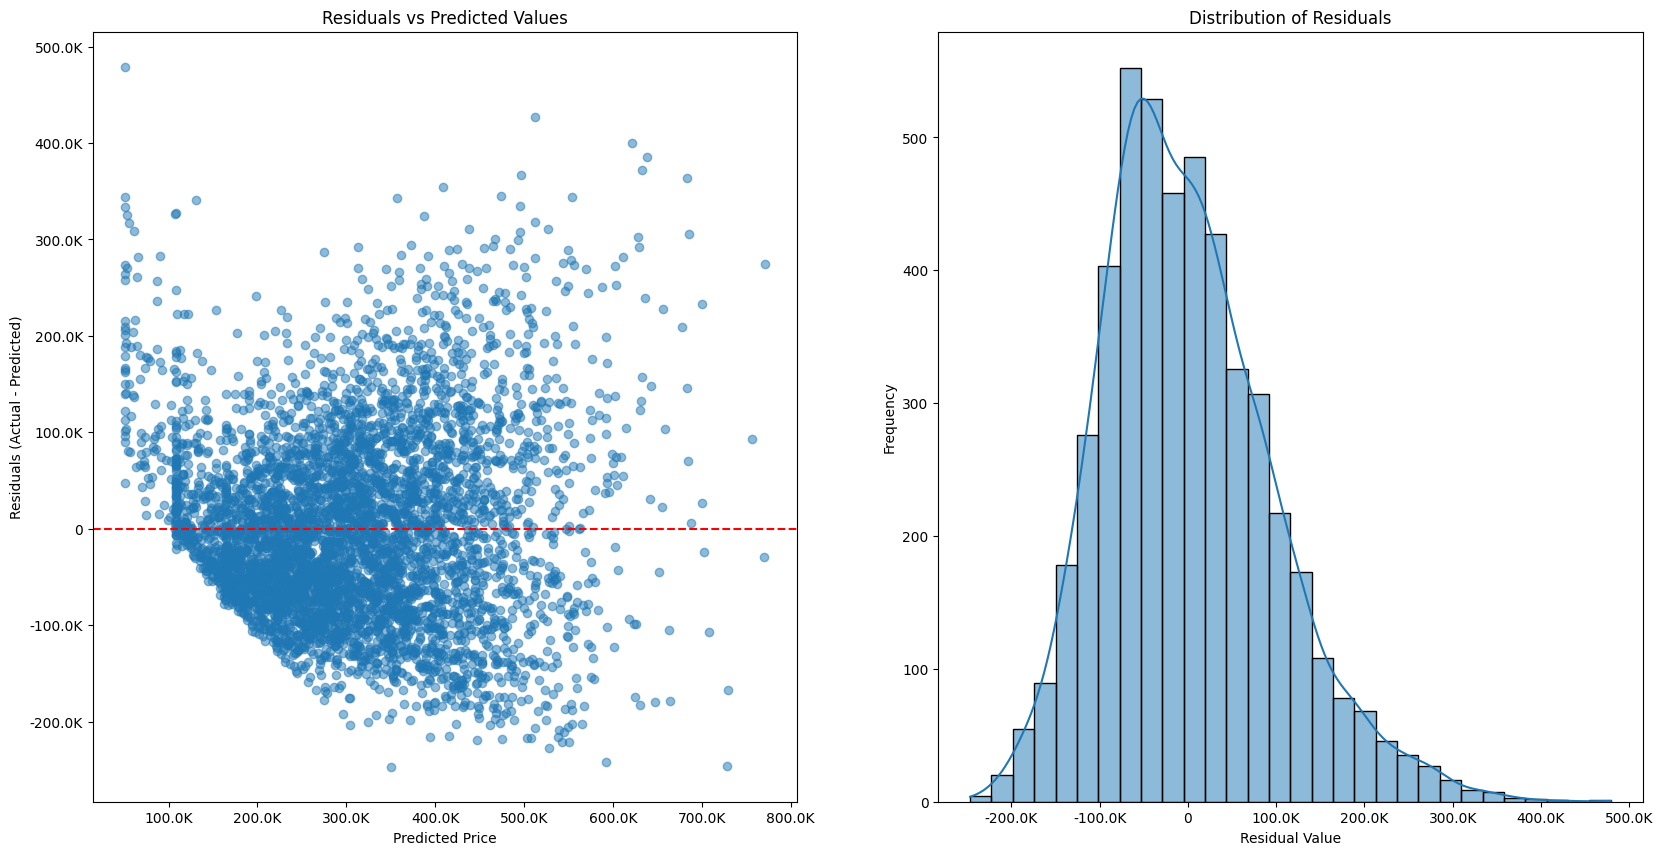

In [237]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(20, 10))

axes[0].scatter(y_train_pred, residuals, alpha=0.5)
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_xlabel("Predicted Price")
axes[0].set_ylabel("Residuals (Actual - Predicted)")
axes[0].set_title("Residuals vs Predicted Values")
axes[0].xaxis.set_major_formatter(ticker.FuncFormatter(human_format))
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(human_format))

sns.histplot(data=residuals, bins=30, edgecolor='black', kde=True, ax=axes[1])
axes[1].set_xlabel("Residual Value")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Distribution of Residuals")
axes[1].xaxis.set_major_formatter(ticker.FuncFormatter(human_format))


#### E4:

In [238]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     2361.
Date:                Wed, 17 Sep 2025   Prob (F-statistic):               0.00
Time:                        20:12:28   Log-Likelihood:                -63196.
No. Observations:                4900   AIC:                         1.264e+05
Df Residuals:                    4896   BIC:                         1.264e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.499e+05   5692.100    -26.334

From our models results above the regression equation is as follows:

<em>Predicted Price = −149,900 + (158.28 × SquareFootage) + (57,230 × NumBedrooms) + (56,170 × NumBathrooms)</em>

This can be understood as the predicted price of a house being equal to the baseline price with 0 sqft, 0 bathrooms, and 0 bedrooms($-149,900) plus $158.28 for every square foot a house has, plus $57,230 for every bedroom and $56,170 for every bathroom.

#### E5:

Our R2, adjusted R2, and for clarity I utilize the root mean squared error(RMSE), as our target data value is in dollars, which would be squared if I used the standard mean squared error(MSE):

<table>
<tr><th>Type</th><th>Value</th></tr>
<tr><td>R2:</td><td>0.591</td></tr>
<tr><td>Adjusted R2:</td><td>0.591</td></tr>
<tr><td>Training RMSE:</td><td>$96,600</td></tr>
<tr><td>Test RMSE:</td><td>$95,493</td></tr>
</table>

From analyzing these values we can tell from our R2 that 59% of the content of a house's price is covered by our model. Our adjusted R2 being the same value tells us that we have no extraneous variables in our model, equating to a model with high efficiency. Lastly, our RMSE's show that our model has an accuracy within $96,000 which is initiated in our training RMSE and confirmed with our test RMSE being near equivalent with the training RMSE.

#### E6 + E7:

Based on our results I can conclude that house prices are significantly determined by square footage, the number of bathrooms and the number of bedrooms. This is predicted with the regression model, and confirmed with numerous statistical testing showing significance between them (p < 0.05). This is significant because a real estate company could look to evaluate and price houses differently depending on their square footage, bedrooms, and bathrooms either raising or lowering prices to predicted values to incentivize customers to purchase near these consistent values. One con of this model is that it only accounts for 59% of a home price(R2 value = 0.59) meaning there is 41% of a homes price that is currently unaccounted for.

I would recommend that real estate company utilize this company to accurately price homes based on these characteristics(square footage, number of bathrooms and bedrooms), and focus development on increasing these factors in future homes to increase revenue.

#### Thank you!

All materials used were from WGU course material or personal experience.